<a href="https://colab.research.google.com/github/Inventor-creator/Steam-recommendations-predictor-thingy/blob/main/Predicting_Recommendations_Of_Steam_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('a_steam_data_2021_2025.csv')

In [5]:
len(df)

65521

In [6]:
df.head(10)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues
5,1724980,The Lone Blade,2023,"May 23, 2023",Action;Adventure;Indie,Single-player;Full controller support;Family S...,1.99,0,Opia Games,Opia Games;Plug In Digital
6,3822820,Knight Crawler,2025,"Jul 16, 2025",Action;Indie;Free To Play,Single-player;Full controller support;Custom V...,0.00,0,Taylor Conolley,Taylor Conolley
7,3863460,No Sweet Looks,2025,"Aug 28, 2025",Action;Indie,Single-player;Steam Achievements;Full controll...,2.99,0,halvardo13,halvardo13
8,3216610,League Of Tacticians: Path of Tarkan,2025,"May 21, 2025",Adventure;RPG;Strategy,Single-player;Family Sharing,3.99,0,Oba Games,Oba Games
9,3057250,Pennylooter,2025,"Sep 8, 2025",Action;Indie,Single-player;Steam Achievements;Full controll...,6.99,0,Josh Sellers,Josh Sellers


In [7]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher'],
      dtype='object')

In [8]:
df.describe()

,appid,release_year,price,recommendations
count,6.552100e+04,65521.000000,65521.000000,65521.000000
mean,2.580607e+06,2023.453091,7.204043,362.165336
std,7.692480e+05,1.386641,16.914429,6936.837198
min,1.200220e+06,2021.000000,0.000000,0.000000
25%,1.916970e+06,2022.000000,0.990000,0.000000
50%,2.516050e+06,2024.000000,3.990000,0.000000
75%,3.193800e+06,2025.000000,9.740000,0.000000
max,4.243930e+06,2025.000000,1900.000000,862487.000000


In [9]:
df.dtypes

appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
dtype: object

In [10]:
df['recommendations'].unique()

array([   0,  240, 4858, ..., 3338, 7071, 3819], shape=(2536,))

In [11]:
df['developer'].unique()

array(['Bouncy Rocket Studios', 'Caramelo Studios', 'Libragames', ...,
       'KIKI GAMES', 'Xennial Digital', 'Rylan Yancey'],
      shape=(45680,), dtype=object)

In [12]:
df['publisher'].unique()

array(['Bouncy Rocket Studios', 'Caramelo Studios', 'Libragames', ...,
       'Xennial Digital', 'PoisonGames', 'Rylan Yancey'],
      shape=(41601,), dtype=object)

In [13]:
for i in df.columns:
  if df[i].isna().any():
    print(i)



genres
categories
developer
publisher


In [14]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher'],
      dtype='object')

In [15]:
recommendations = {}

for i in df.values:
  try:
    recommendations[i[2]] += i[6]
  except:
    recommendations[i[2]] = i[6]

In [16]:
recommendations.keys()

dict_keys([2024, 2025, 2023, 2021, 2022])

In [17]:
recommendations.values()

dict_values([120240.57000002546, 138910.94000002558, 88742.46000000965, 55477.5499999971, 68644.59999999695])

In [18]:
sortedRecs = {}

for i in sorted(recommendations):
  sortedRecs[i] = recommendations[i]

In [19]:
sortedRecs

{2021: 55477.5499999971,
 2022: 68644.59999999695,
 2023: 88742.46000000965,
 2024: 120240.57000002546,
 2025: 138910.94000002558}

In [20]:
recommendations

{2024: 120240.57000002546,
 2025: 138910.94000002558,
 2023: 88742.46000000965,
 2021: 55477.5499999971,
 2022: 68644.59999999695}

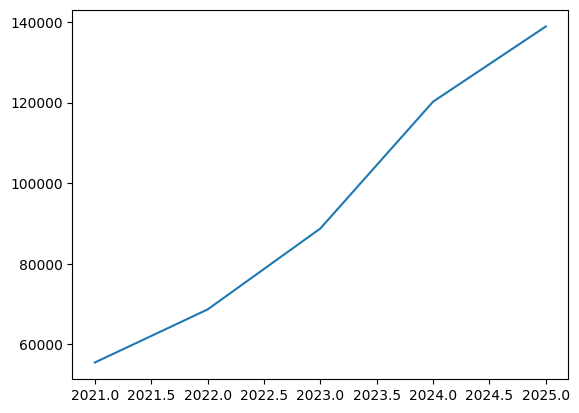

In [21]:
plt.plot(sortedRecs.keys() , sortedRecs.values())

In [22]:
def ConvertDatetime(rows):
  months = {
      'Jan' : 1,
      'Feb' : 2,
      'Mar' : 3,
      'Apr' : 4,
      'May' : 5,
      'Jun' : 6,
      'Jul' : 7,
      'Aug' : 8,
      'Sep' : 9,
      'Oct' : 10,
      'Nov' : 11,
      'Dec' : 12,
      'Q4' : 10

  }

  dateArr = []
  monthArr = []

  for i in rows:
    spiltI = i.split(' ')

    try:
      dateArr.append(int(spiltI[1][:-1]))
      monthArr.append(months[spiltI[0]])

    except:
      if(len(dateArr) > len(monthArr)):
        monthArr.append(np.nan)
      else:
        dateArr.append(np.nan)
        monthArr.append(np.nan)


  return dateArr , monthArr


In [23]:
df['releaseDate'] , df['releaseMonth'] = ConvertDatetime(df['release_date'])

In [24]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher', 'releaseDate',
       'releaseMonth'],
      dtype='object')

In [25]:
df.dtypes

appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
releaseDate        float64
releaseMonth       float64
dtype: object

In [26]:
df.shape

(65521, 12)

In [27]:
df.dropna(subset=['releaseDate' , 'releaseMonth'] , inplace=True)

In [28]:

recommendationMonthly = {}

for i in df.values:
  try:
    recommendationMonthly[i[-1]] += i[6]
  except:
    recommendationMonthly[i[-1]] = i[6]


In [29]:
sortedRecsMonthly = {}

for i in sorted(recommendationMonthly):
  sortedRecsMonthly[i] = recommendationMonthly[i]

In [30]:
sortedRecsMonthly

{1.0: 30246.560000001973,
 2.0: 35038.81000000201,
 3.0: 38801.57000000096,
 4.0: 36900.01000000146,
 5.0: 40816.49000000057,
 6.0: 36874.02000000147,
 7.0: 39573.46000000097,
 8.0: 39910.89000000061,
 9.0: 41768.73000000076,
 10.0: 50631.07999999878,
 11.0: 48411.45999999882,
 12.0: 33043.04000000237}

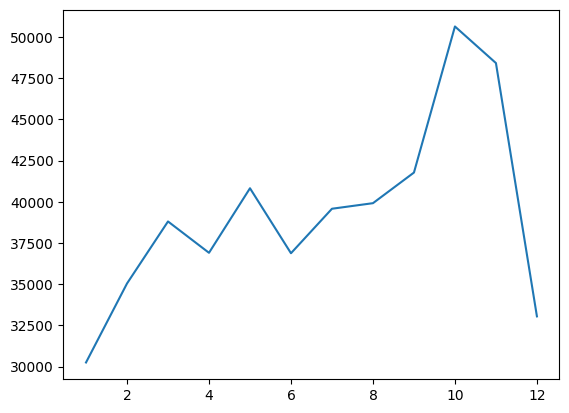

In [31]:
plt.plot(sortedRecsMonthly.keys() ,sortedRecsMonthly.values() , scalex=True )

In [32]:
df['categories'].unique()

array(['Single-player;Family Sharing',
       'Single-player;Save Anytime;Family Sharing',
       'Single-player;Steam Achievements;Full controller support;Custom Volume Controls;Adjustable Difficulty;Playable without Timed Input;Steam Cloud;Steam Leaderboards;Family Sharing',
       ...,
       'Single-player;Steam Achievements;Steam Workshop;Steam Leaderboards;Family Sharing',
       'Single-player;Steam Achievements;Full controller support;Color Alternatives;Custom Volume Controls;Adjustable Difficulty;Playable without Timed Input;Steam Cloud;Stats;Family Sharing',
       'Single-player;Multi-player;PvP;LAN PvP;Shared/Split Screen PvP;Shared/Split Screen;Steam Cloud;Remote Play Together;Family Sharing'],
      shape=(7829,), dtype=object)

In [33]:
df['categories'].astype(str)

0                             Single-player;Family Sharing
1                Single-player;Save Anytime;Family Sharing
2        Single-player;Steam Achievements;Full controll...
3        Single-player;Steam Achievements;Full controll...
4        Single-player;Steam Achievements;Full controll...
                               ...                        
65516                         Single-player;Family Sharing
65517                         Single-player;Family Sharing
65518    Single-player;Tracked Controller Support;VR On...
65519    Single-player;Partial Controller Support;Famil...
65520                         Single-player;Family Sharing
Name: categories, Length: 64476, dtype: object

In [34]:
categoriesSet = set()


for entry in df['categories']:
  try:
    for i in entry.split(';'):
      categoriesSet.add(i)


  except:
    continue




In [35]:
df['categories'].replace(np.nan , "" ,inplace=True)

/var/folders/5m/_j_596211w579lz0xp790_0m0000gn/T/ipykernel_93979/1626392661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['categories'].replace(np.nan , "" ,inplace=True)


In [36]:
for feature in categoriesSet:
    df[feature] = df['categories'].str.contains(feature).astype(int)


df = df.drop(columns=['categories'])

In [37]:
genresCategories = set()

for entry in df['genres']:
  try:
    for i in entry.split(';'):
      genresCategories.add(i)


  except:
    continue


In [38]:
df['genres'].replace(np.nan , "" ,inplace=True)


/var/folders/5m/_j_596211w579lz0xp790_0m0000gn/T/ipykernel_93979/1755297341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].replace(np.nan , "" ,inplace=True)


In [39]:
for feature in genresCategories:
    df[feature] = df['genres'].str.contains(feature).astype(int)


df = df.drop(columns=['genres'])

In [40]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'price',
       'recommendations', 'developer', 'publisher', 'releaseDate',
       'releaseMonth', 'Stereo Sound', 'Captions available', 'Surround Sound',
       'Adjustable Difficulty', 'Multi-player', 'Chat Speech-to-text',
       'Color Alternatives', 'Steam Achievements', 'LAN Co-op', 'VR Only',
       'Single-player', 'VR Supported', 'Steam Leaderboards',
       'Narrated Game Menus', 'Mouse Only Option', 'Steam Turn Notifications',
       'Steam Workshop', 'Remote Play on Phone', 'Online Co-op',
       'Tracked Controller Support', 'Keyboard Only Option',
       'Touch Only Option', 'Save Anytime', 'Partial Controller Support',
       'Remote Play Together', 'Shared/Split Screen Co-op',
       'Full controller support', 'Commentary available',
       'Steam Trading Cards', 'Online PvP', 'Remote Play on Tablet', 'MMO',
       'Co-op', 'Subtitle Options', 'Steam Timeline', 'HDR available',
       'Camera Comfort', 'Remote Play

In [41]:
df

,appid,name,release_year,release_date,price,recommendations,developer,publisher,releaseDate,releaseMonth,...,Sports,Simulation,Accounting,Strategy,Audio Production,Education,Web Publishing,Racing,Massively Multiplayer,Utilities
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios,5.0,7.0,...,0,0,0,1,0,0,0,0,0,0
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",7.99,0,Caramelo Studios,Caramelo Studios,25.0,7.0,...,0,1,0,1,0,0,0,0,0,0
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",12.99,0,Libragames,Libragames,17.0,6.0,...,0,0,0,1,0,0,0,0,0,0
3,2403620,Air Twister,2023,"Nov 10, 2023",24.99,0,YS Net,ININ,10.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,1538040,Horde Slayer,2021,"Mar 19, 2021",3.99,0,Wagner Rodrigues,Wagner Rodrigues,19.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65516,3097010,X Simulator Drone,2024,"Jul 31, 2024",14.99,0,Inonia Games,Inonia Games,31.0,7.0,...,0,1,0,0,0,0,0,0,0,0
65517,3304930,Retro Dungeon Slayer,2025,"Mar 3, 2025",4.99,0,Hard Shark Games,Hard Shark Games,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
65518,1461580,Molecule Builder,2021,"Feb 4, 2021",14.99,0,Xennial Digital,Xennial Digital,4.0,2.0,...,0,1,0,0,0,1,0,0,0,0
65519,1379120,MechNest,2024,"Apr 13, 2024",15.99,0,PoisonGames,PoisonGames,13.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
decTree = DecisionTreeRegressor()

In [47]:
desForest = RandomForestRegressor()

In [48]:
knn = KNeighborsRegressor()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
y = df['recommendations']

In [52]:
df.drop(['appid' , 'name' , 'recommendations','release_date' ] , inplace= True , axis=1)

In [53]:
scaler = StandardScaler()

In [54]:
encoderPipe = Pipeline(steps=[
    ('encoder' , OneHotEncoder( handle_unknown='ignore'))
])

In [55]:
scalingPipe = Pipeline(steps=[
    ('scaler' ,scaler )

])

In [56]:
scalerTransformer = ColumnTransformer(transformers=[
    ('scaler' ,  scalingPipe , ['release_year', 'price']),
    ('OneHotEncoder' , encoderPipe, ['developer' , 'publisher']),


] , remainder='passthrough')

In [57]:
xTrain , xTest , yTrain , yTest = train_test_split(df , y , test_size=0.3)

In [58]:
sampler = RandomOverSampler()

# xResampled , yResampled = sampler.fit_resample(xTrain , yTrain)


KeyboardInterrupt



In [63]:
xTrainScaled = scalerTransformer.fit_transform(xTrain)
xTestScaled = scalerTransformer.transform(xTest)

In [64]:
xTrainScaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 595689 stored elements and shape (45133, 63630)>

In [65]:
desForest.fit(xTrainScaled , yTrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
knn.fit(xTrainScaled , yTrain)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [67]:
decTree.fit(xTrainScaled , yTrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [68]:
yPred = desForest.predict(xTestScaled)

In [69]:
knnPred = knn.predict(xTestScaled)

In [70]:
decTreePred = decTree.predict(xTestScaled)

In [71]:
from sklearn.metrics import root_mean_squared_error

In [72]:
root_mean_squared_error(yTest , yPred)

3956.9918632343683

In [73]:
root_mean_squared_error(yTest , knnPred)

4000.0329914805507

In [74]:
root_mean_squared_error(yTest , decTreePred)

4706.739061299222

In [75]:
?root_mean_squared_error